# Exploring Disaster Tweet Dataset

# Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the Dataset

In [38]:
data_file_path = r'C:\Users\Shubham.G.Gohil\OneDrive\Documents\tweets.csv'
df = pd.read_csv(file_path)
df = pd.read_csv(data_file_path)
print(tweets_df.head())

   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  \
0  Communal violence in Bhainsa, Telangana. "Ston...       1   
1  Telangana: Section 144 has been imposed in Bha...       1   
2  Arsonist sets cars ablaze at dealership https:...       1   
3  Arsonist sets cars ablaze at dealership https:...       1   
4  "Lord Jesus, your love brings freedom and pard...       0   

                                        cleaned_text  
0  communal violence in bhainsa telangana stones ...  
1  telangana section  has been imposed in bhainsa...  
2  arsonist sets cars ablaze at dealership httpst...  
3  arsonist sets cars ablaze at dealership httpst...  
4  lord jesus your love brings freedom and pardon...  


# Understanding the Structure of the Dataset

In [19]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB
None


# Handling Missing Values

In [22]:
print("\nMissing values before cleanup:")
print(df.isnull().sum())


Missing values before cleanup:
id             0
keyword        0
location    3418
text           0
target         0
dtype: int64


In [24]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text)
tweets_df.head()

id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  \
0  Communal violence in Bhainsa, Telangana. "Ston...       1   
1  Telangana: Section 144 has been imposed in Bha...       1   
2  Arsonist sets cars ablaze at dealership https:...       1   
3  Arsonist sets cars ablaze at dealership https:...       1   
4  "Lord Jesus, your love brings freedom and pard...       0   

                                        cleaned_text  
0  communal violence in bhainsa telangana stones ...  
1  telangana section  has been imposed in bhainsa...  
2  arsonist sets cars ablaze at dealership httpst...  
3  arsonist sets cars ablaze at dealership httpst...  
4  lord jesus your love brings freedom and pardon...

# Data Visualization

#### 1. Visualize disaster vs. non-disaster tweet distribution insights

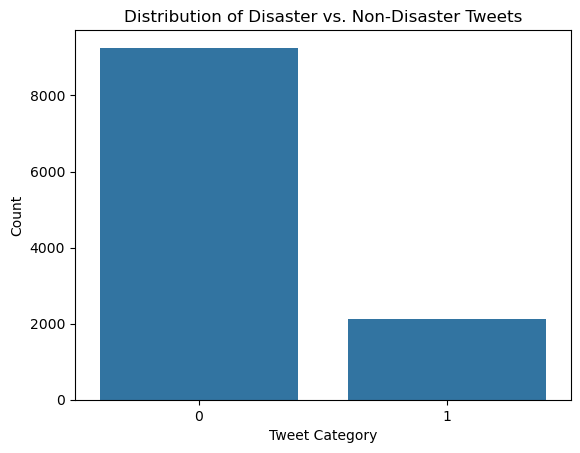

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (adjust the path as needed)
tweets_df = pd.read_csv(r'C:\Users\Shubham.G.Gohil\OneDrive\Documents\tweets.csv')

# Ensure the column 'target' exists in the dataset
sns.countplot(x='target', data=tweets_df)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Tweet Category')
plt.ylabel('Count')
plt.show()


#### 2. The dataset is cleaned; now we will tokenize, remove stopwords, and perform lemmatization.

C:\Users\Shubham.G.Gohil\AppData\Local\Temp\ipykernel_18824\2626791863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')


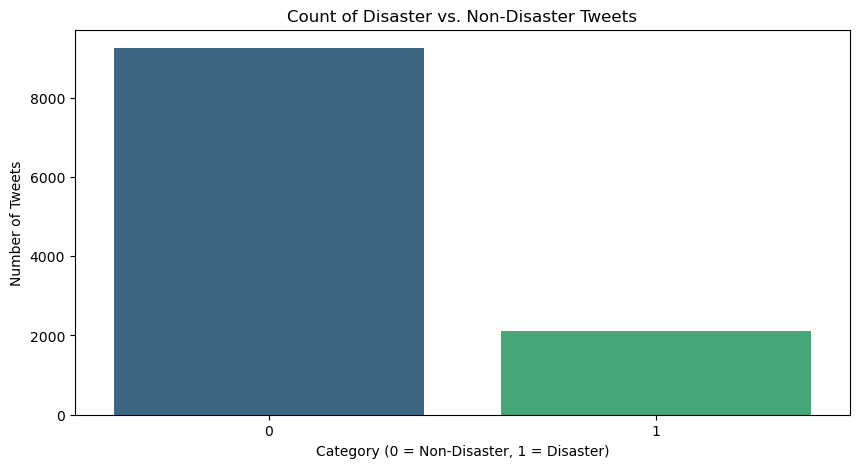

In [57]:
disaster_counts = tweets_df['target'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')
plt.title('Count of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Category (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

# Text Preprocessing 

### 1. Load Libraries and NLTK resources 

In [24]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubham.G.Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham.G.Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubham.G.Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2. Load and Display Few rows

In [10]:
file_path = r'C:\Users\Shubham.G.Gohil\OneDrive\Documents\tweets.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the original DataFrame
print("Original DataFrame:")
print(df.head())

# Display the column names to confirm
print("\nColumns in DataFrame:", df.columns.tolist())

Original DataFrame:
   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  

Columns in DataFrame: ['id', 'keyword', 'location', 'text', 'target']


### 3. Clean DataFrame

In [13]:
df_clean = df.dropna(subset=['text'])

### 4. Applied Preprocessing Functions
#####     (1) Lowercasing
#####     (2) Removing URLs
#####     (3) Removing User Mentions and Hashtags (Optional)
#####     (4) Removing Punctuation
#####     (5) Removing Numbers
#####     (6) Tokenizing
#####     (7) Removing stopwords
#####     (8) Lemmatization
#####     (9) Removing extra whitespace

In [19]:
def preprocess_tweet(tweet):
    # Lowercasing
    tweet = tweet.lower()
    
    # Removing URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Removing User Mentions and Hashtags
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    
    # Removing Punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Removing Numbers
    tweet = re.sub(r'\d+', '', tweet)
    
    # Tokenizing
    tokens = word_tokenize(tweet)
    
    # Removing stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Removing extra whitespace
    tweet = ' '.join(tokens)
    
    return tweet

if 'text' in df_clean.columns:  # Check if the column exists
    df_clean['processed_tweet'] = df_clean['text'].apply(preprocess_tweet)

    # Display the cleaned and preprocessed tweets
    print("\nFirst few rows of processed tweets:")
    print(df_clean[['text', 'processed_tweet']].head())
else:
    print("Column 'text' not found in the DataFrame.")


First few rows of processed tweets:
                                                text  \
0  Communal violence in Bhainsa, Telangana. "Ston...   
1  Telangana: Section 144 has been imposed in Bha...   
2  Arsonist sets cars ablaze at dealership https:...   
3  Arsonist sets cars ablaze at dealership https:...   
4  "Lord Jesus, your love brings freedom and pard...   

                                     processed_tweet  
0  communal violence bhainsa telangana stone pelt...  
1  telangana section imposed bhainsa january clas...  
2                 arsonist set car ablaze dealership  
3                 arsonist set car ablaze dealership  
4  lord jesus love brings freedom pardon fill hol...  


# Conclusion

### Common Keywords in Tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham.G.Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Shubham.G.Gohil\AppData\Local\Temp\ipykernel_10292\658109109.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


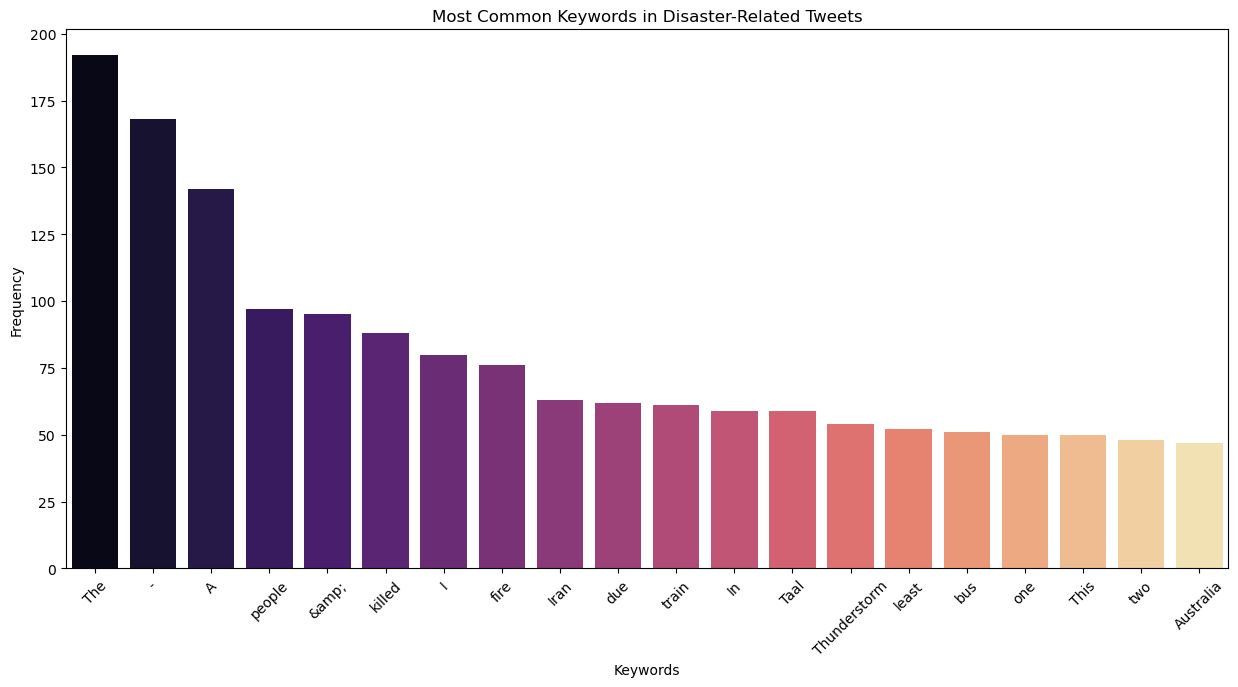

In [48]:
# Finding the most common keywords in disaster-related tweets
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
disaster_tweets = df[df['target'] == 1]['text']
all_words = ' '.join(disaster_tweets).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plotting the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Most Common Keywords in Disaster-Related Tweets')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# SMOTE Implementation

### Borderline SMOTE (Borderline SMOTE-1 and Borderline SMOTE-2)

In [5]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\Shubham.G.Gohil\\OneDrive\\Documents\\tweet123.csv'
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.head())
print(df.info())


   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ 

Original training dataset shape: Counter({0: 6448, 1: 1511})
Resampled training dataset shape with Borderline SMOTE-1: Counter({0: 6448, 1: 6448})
Resampled training dataset shape with Borderline SMOTE-2: Counter({0: 6448, 1: 6448})


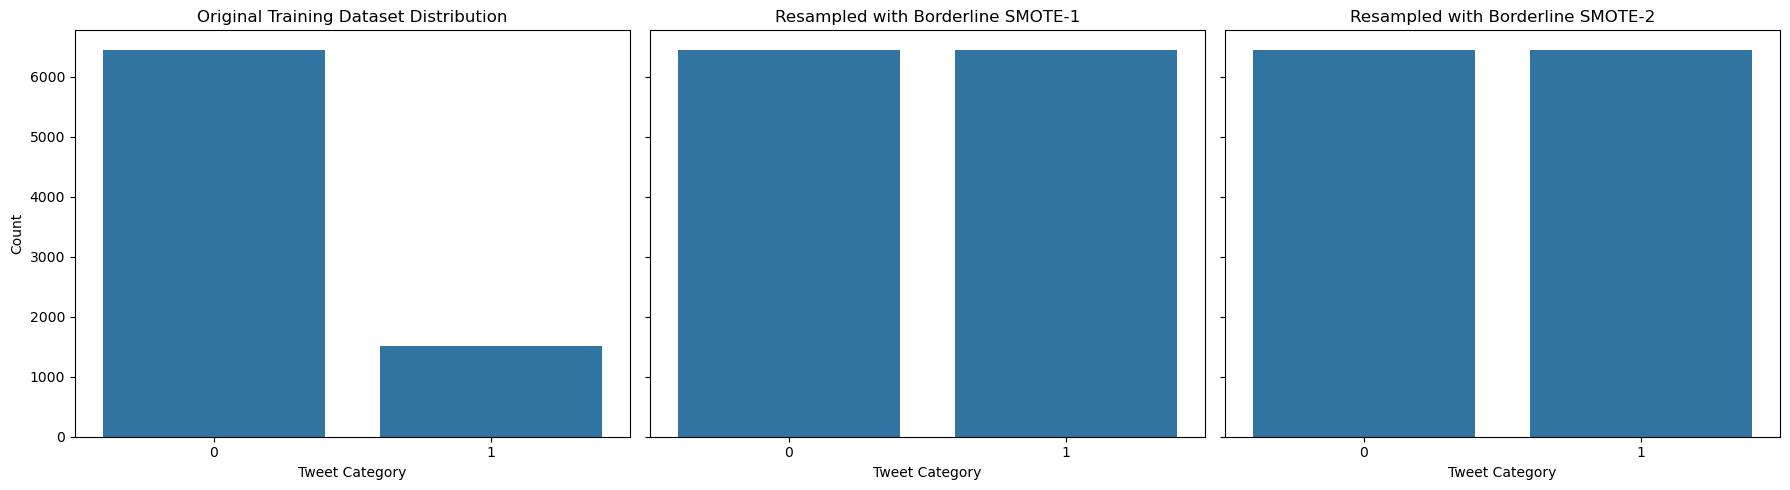

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:\\Users\\Shubham.G.Gohil\\OneDrive\\Documents\\tweet123.csv'
df = pd.read_csv(file_path)

# Define features and target
X = df['text']            # 'text' column contains the tweet content
y = df['target']          # 'target' column contains the class labels

# Convert text data to numerical format using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Convert the TF-IDF sparse matrix to dense format for BorderlineSMOTE
X_dense = X_tfidf.toarray()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.3, random_state=42)
print(f"Original training dataset shape: {Counter(y_train)}")

# Apply Borderline SMOTE-1
borderline_smote_1 = BorderlineSMOTE(kind="borderline-1", random_state=42)
X_resampled_1, y_resampled_1 = borderline_smote_1.fit_resample(X_train, y_train)
print(f"Resampled training dataset shape with Borderline SMOTE-1: {Counter(y_resampled_1)}")

# Apply Borderline SMOTE-2
borderline_smote_2 = BorderlineSMOTE(kind="borderline-2", random_state=42)
X_resampled_2, y_resampled_2 = borderline_smote_2.fit_resample(X_train, y_train)
print(f"Resampled training dataset shape with Borderline SMOTE-2: {Counter(y_resampled_2)}")

# Visualization: Original and Resampled Distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Original Training Dataset Distribution
sns.barplot(x=list(Counter(y_train).keys()), y=list(Counter(y_train).values()), ax=axes[0])
axes[0].set_title('Original Training Dataset Distribution')
axes[0].set_xlabel('Tweet Category')
axes[0].set_ylabel('Count')

# Resampled Training Dataset Distribution with Borderline SMOTE-1
sns.barplot(x=list(Counter(y_resampled_1).keys()), y=list(Counter(y_resampled_1).values()), ax=axes[1])
axes[1].set_title('Resampled with Borderline SMOTE-1')
axes[1].set_xlabel('Tweet Category')

# Resampled Training Dataset Distribution with Borderline SMOTE-2
sns.barplot(x=list(Counter(y_resampled_2).keys()), y=list(Counter(y_resampled_2).values()), ax=axes[2])
axes[2].set_title('Resampled with Borderline SMOTE-2')
axes[2].set_xlabel('Tweet Category')

plt.tight_layout()
plt.show()


# Machine Learning Model

## Logistic Regression Model

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train and evaluate Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy in percentage
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg) * 100
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}%")


Logistic Regression Accuracy: 88.74%


## Random Forest Model

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate Random Forest
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_resampled, y_resampled)
y_pred_rand_forest = rand_forest.predict(X_test)

# Calculate accuracy in percentage
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest) * 100
print(f"Random Forest Accuracy: {accuracy_rand_forest:.2f}%")


Random Forest Accuracy: 88.30%


## K-Nearest Neighbors (KNN) Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Train and evaluate K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)
y_pred_knn = knn.predict(X_test)

# Calculate accuracy in percentage
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}%")


K-Nearest Neighbors Accuracy: 21.58%


## Model Comparison


Model Accuracy Comparison (in %):
Logistic Regression: 88.74%
Random Forest: 88.30%
K-Nearest Neighbors: 21.58%


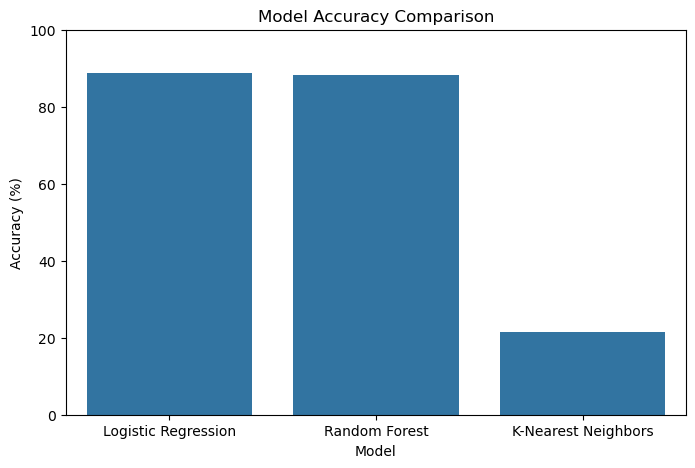

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare accuracies
model_accuracies = {
    'Logistic Regression': accuracy_log_reg,
    'Random Forest': accuracy_rand_forest,
    'K-Nearest Neighbors': accuracy_knn
}

# Display comparison
print("\nModel Accuracy Comparison (in %):")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.2f}%")

# Visualization: Compare Model Accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()


In [9]:
import pandas as pd

# Assuming you already have the accuracy values from previous steps
# Replace these with your actual accuracy variables
accuracy_log_reg = 88.74  # Replace with actual accuracy value for Logistic Regression
accuracy_rand_forest = 88.30  # Replace with actual accuracy value for Random Forest
accuracy_knn = 21.58  # Replace with actual accuracy value for K-Nearest Neighbors

# Tabular presentation of results
model_results = {
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy (%)': [accuracy_log_reg, accuracy_rand_forest, accuracy_knn]
}

results_df = pd.DataFrame(model_results)

# Display the results in a tabular format
print("\nModel Accuracy Comparison:")
print(results_df)

# Optionally, if you want to save the results to a CSV file
results_df.to_csv('model_accuracy_comparison.csv', index=False)



Model Accuracy Comparison:
                 Model  Accuracy (%)
0  Logistic Regression         88.74
1        Random Forest         88.30
2  K-Nearest Neighbors         21.58


# StopWord Removal 

In [54]:
import nltk
nltk.download('stopwords')

# Assuming 'text' column contains your tweets, tokenize and apply stopword removal
tweets_df['tokens'] = tweets_df['text'].apply(lambda x: nltk.word_tokenize(x))
stop_words = set(stopwords.words('english'))
tweets_df['tokens'] = tweets_df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham.G.Gohil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# Checking a few examples to ensure stopwords are removed
print(tweets_df['tokens'].head())

0    [Communal, violence, Bhainsa, ,, Telangana, .,...
1    [Telangana, :, Section, 144, imposed, Bhainsa,...
2    [Arsonist, sets, cars, ablaze, dealership, htt...
3    [Arsonist, sets, cars, ablaze, dealership, htt...
4    [``, Lord, Jesus, ,, love, brings, freedom, pa...
Name: tokens, dtype: object


# Stemming 

In [61]:
stemmer = PorterStemmer()
# Apply stemming to each token
tweets_df['stemmed'] = tweets_df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
# Check some examples
print(tweets_df[['tokens', 'stemmed']].head())


                                              tokens  \
0  [Communal, violence, Bhainsa, ,, Telangana, .,...   
1  [Telangana, :, Section, 144, imposed, Bhainsa,...   
2  [Arsonist, sets, cars, ablaze, dealership, htt...   
3  [Arsonist, sets, cars, ablaze, dealership, htt...   
4  [``, Lord, Jesus, ,, love, brings, freedom, pa...   

                                             stemmed  
0  [commun, violenc, bhainsa, ,, telangana, ., ``...  
1  [telangana, :, section, 144, impos, bhainsa, j...  
2  [arsonist, set, car, ablaz, dealership, http, ...  
3  [arsonist, set, car, ablaz, dealership, http, ...  
4  [``, lord, jesu, ,, love, bring, freedom, pard...  
